# 数据预处理

In [29]:
#读取数据，查看数据情况
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import pandas as pd
data_path ="..\data\merged_cog_sswrer.csv"
data = pd.read_csv(data_path)
print(data.head())
print(data.info())

    HHID  PN  R1IMRC20  R2HIMRC20  R3IMRC  R4IMRC  R5IMRC  R6IMRC  R7IMRC  \
0      1  10      11.0        NaN     NaN     NaN     NaN     NaN     NaN   
1      2  10      11.0        7.0     5.0     5.0     5.0     NaN     NaN   
2      3  10       5.0        3.0    10.0    10.0    10.0     9.0     4.0   
3      3  20      11.0       11.0     6.0     6.0     6.0     6.0     6.0   
4  10001  10       5.0        8.0     7.0     8.0     7.0     5.0     7.0   

   R8IMRC  ...  R11SSWRER  H11SSWRER  R12SSWRER  H12SSWRER  R13SSWRER  \
0     NaN  ...        NaN        NaN        NaN        NaN        NaN   
1     NaN  ...        NaN        NaN        NaN        NaN        NaN   
2     3.0  ...        NaN        NaN        NaN        NaN        NaN   
3     5.0  ...        NaN        NaN        NaN        NaN        NaN   
4     7.0  ...        NaN        NaN        NaN        NaN        NaN   

   H13SSWRER  R14SSWRER  H14SSWRER  R15SSWRER  H15SSWRER  
0        NaN        NaN        NaN     

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\22779\AppData\Local\Temp\ipykernel_32136\1723492719.py:2: SyntaxWarning: invalid escape sequence '\d'
  data_path ="..\data\merged_cog_sswrer.csv"


In [31]:
# 填补每一列的缺失值
data.iloc[:, 1:] = data.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()), axis=0)
# 打印结果
print(data.describe())

                HHID            PN      R1IMRC20     R2HIMRC20        R3IMRC  \
count   30914.000000  30914.000000  30914.000000  30914.000000  30914.000000   
mean   320132.204470     15.572200      7.440040      7.909924      6.021907   
std    286655.653752      8.091804      1.693627      1.867062      0.974277   
min         1.000000     10.000000      0.000000      0.000000      0.000000   
25%     51056.750000     10.000000      7.440040      7.909924      6.021907   
50%    173689.500000     10.000000      7.440040      7.909924      6.021907   
75%    535162.750000     20.000000      7.440040      7.909924      6.021907   
max    959738.000000     43.000000     20.000000     20.000000     10.000000   

             R4IMRC        R5IMRC        R6IMRC        R7IMRC        R8IMRC  \
count  30914.000000  30914.000000  30914.000000  30914.000000  30914.000000   
mean       6.131755      5.874208      5.815895      5.706746      5.662717   
std        1.050103      1.020877      0.9

In [32]:
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


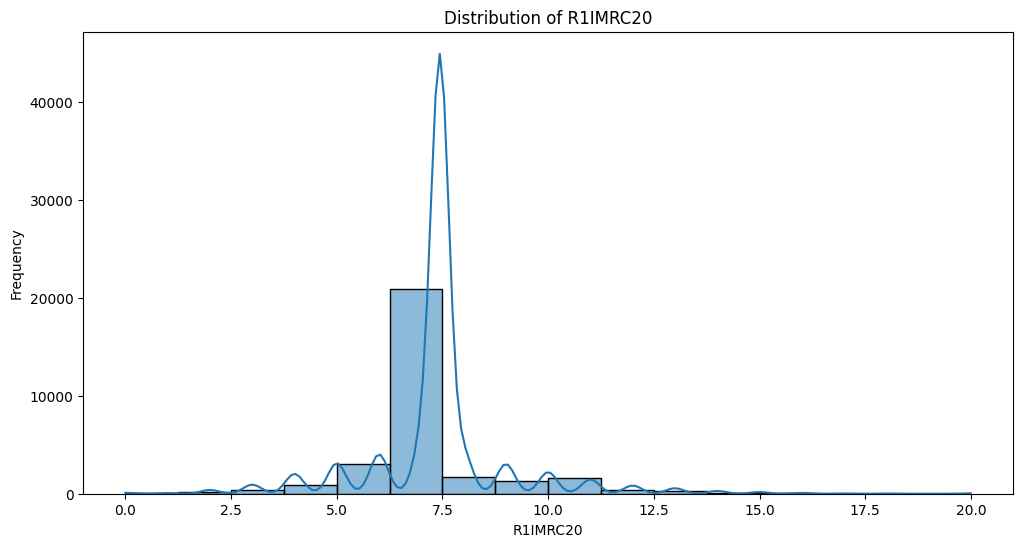

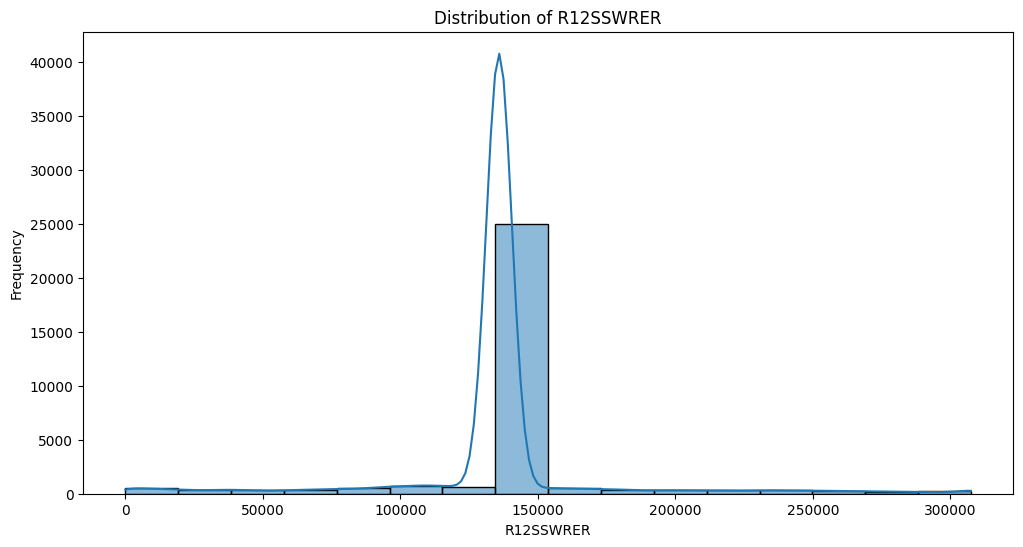

In [33]:
#数据可视化查看，数据分布情况，决定用哪种归一化方法

import seaborn as sns

import matplotlib.pyplot as plt

# Plot histogram for R1IMRC20
plt.figure(figsize=(12, 6))
sns.histplot(data['R1IMRC20'], kde=True)
plt.title('Distribution of R1IMRC20')
plt.xlabel('R1IMRC20')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for R12SSWRER
plt.figure(figsize=(12, 6))
sns.histplot(data['R12SSWRER'], kde=True)
plt.title('Distribution of R12SSWRER')
plt.xlabel('R12SSWRER')
plt.ylabel('Frequency')
plt.show()



# 保存数据处理结果

In [34]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
#使用Z-score归一化数据，然后保存为processed_data.csv

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.iloc[:, 1:])
scaled_df = pd.DataFrame(scaled_features, columns=data.columns[1:])
scaled_df.insert(0, 'HHID', data['HHID'])

scaled_df.to_csv('..\data\processed_data.csv', index=False)
print("Data has been normalized and saved to processed_data.csv.")


<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
C:\Users\22779\AppData\Local\Temp\ipykernel_32136\4292158741.py:10: SyntaxWarning: invalid escape sequence '\d'
  scaled_df.to_csv('..\data\processed_data.csv', index=False)


Data has been normalized and saved to processed_data.csv.


# PCA降维处理

<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:35: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:35: SyntaxWarning: invalid escape sequence '\d'
C:\Users\22779\AppData\Local\Temp\ipykernel_32136\2308239884.py:20: SyntaxWarning: invalid escape sequence '\d'
  output_file = "..\data\pca_explained_variance_ratio.csv"
C:\Users\22779\AppData\Local\Temp\ipykernel_32136\2308239884.py:35: SyntaxWarning: invalid escape sequence '\d'
  pca_data_output_file = "..\data\pca_data.csv"


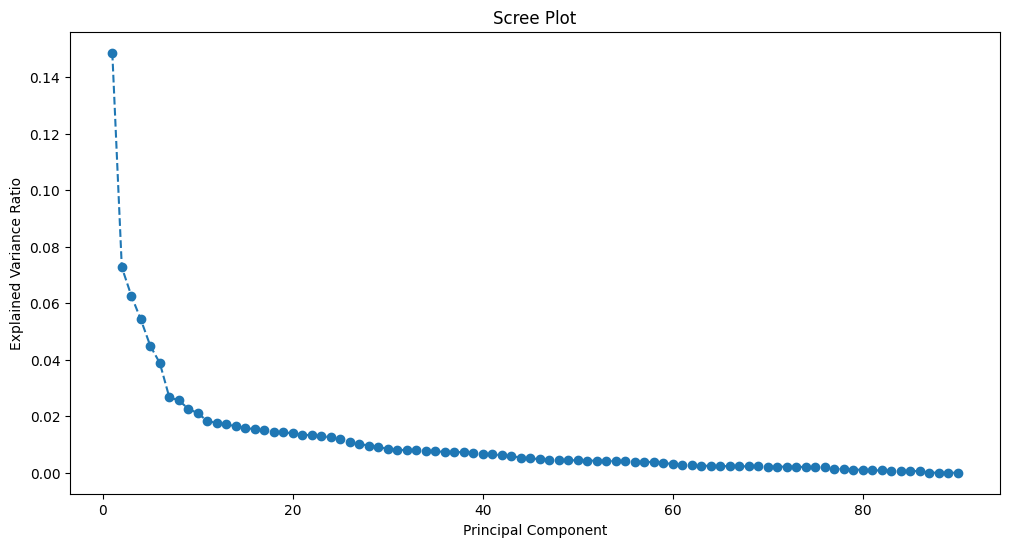

PCA 结果已保存到文件: ..\data\pca_explained_variance_ratio.csv


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- R1IMRC20


In [45]:

from sklearn.decomposition import PCA

# 使用PCA降维处理
pca = PCA(n_components='mle')
pca.fit(scaled_df.iloc[:, 1:])

# 绘制scree plot查看特征值的排序
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')#主成分
plt.ylabel('Explained Variance Ratio')#解释方差/总方差的比例，越大则该成分越重要
plt.show()

pca_result = pd.DataFrame({
    'PrincipalComponent': range(1, len(pca.explained_variance_ratio_) + 1),
    'ExplainedVarianceRatio': pca.explained_variance_ratio_
})

output_file = "..\data\pca_explained_variance_ratio.csv"
pca_result.to_csv(output_file, index=False)
print(f"PCA 结果已保存到文件: {output_file}")

#删除HHID这一列（如果存在）
if 'HHID' in scaled_df.columns:
    scaled_df = scaled_df.drop(columns=['HHID'], axis=1)
if 'PN' in scaled_df.columns:
    scaled_df = scaled_df.drop(columns=['PN'], axis=1)
pca_data = pca.transform(scaled_df)
pca_data_df = pd.DataFrame(
    data=pca_data,
    columns=[f"PC_{i}" for i in range(1, pca.n_components_ + 1)]
)

pca_data_output_file = "..\data\pca_data.csv"
pca_data_df.to_csv(pca_data_output_file, index=False)
print(f"PCA 数据已保存到文件: {pca_data_output_file}")

loadings = pd.DataFrame(pca.components_.T, columns=[f"PC_{i}" for i in range(1, pca.n_components_ + 1)])
loadings_output_file = "..\\data\\loadings.csv"
loadings.to_csv(loadings_output_file, index=False)
print(f"载荷矩阵已保存到文件: {loadings_output_file}")



In [42]:
eigenvalues_length =len(pca.explained_variance_)

# 打印特征值
print("PCA后的特征数量", eigenvalues_length)

PCA后的特征数量 90


In [ ]:
!pip install numpy


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


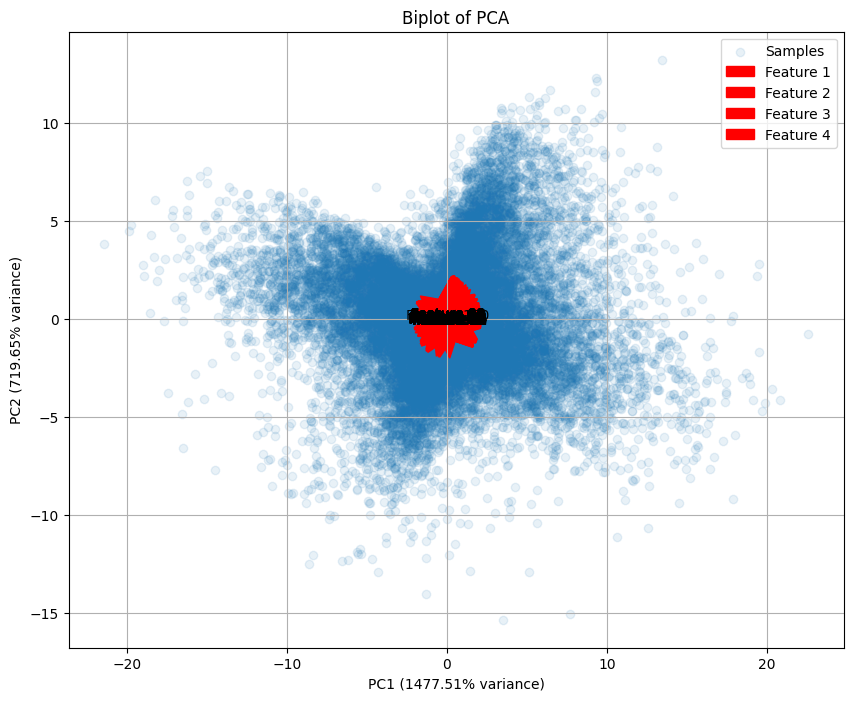

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)  # 为了可视化，通常选择前两个主成分
pca.fit(scaled_df.iloc[:, 1:])

# 获取主成分的投影
X_pca = pca.transform(scaled_df.iloc[:, 1:])

# 获取特征向量（主成分的方向）
components = pca.components_.T  # 转置以便于绘图

# 获取特征值（方差）
explained_variance = pca.explained_variance_

# 创建biplot
plt.figure(figsize=(10, 8))

# 绘制样本点
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.1, label='Samples')

# 绘制特征向量（箭头）
for i, (x, y) in enumerate(components):
    plt.arrow(0, 0, x, y, color='r', alpha=1, label=f'Feature {i+1}' if i < 4 else "", 
              head_width=0.2, head_length=0.2)

# 添加特征名称
for i, (x, y) in enumerate(components):
    plt.text(x + 0.02, y + 0.02, f'Feature {i+1}', fontsize=10, ha='center', va='center')

# 设置图形标题和标签
plt.title('Biplot of PCA')
plt.xlabel(f'PC1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2%} variance)')
plt.legend()
plt.grid()
plt.show()